El código lo tomé de [aqui](http://adilmoujahid.com/posts/2014/07/twitter-analytics/) . Que es simplemente la página que nos mandó el profesor

In [11]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import re

%matplotlib inline

In [2]:
tweets_data = []

tweets_file = open("twitter_data.txt", "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
        
    except:
        continue

In [10]:
tweets_data

[{'created_at': 'Fri Oct 18 03:37:27 +0000 2019',
  'id': 1185037145301405696,
  'id_str': '1185037145301405696',
  'text': 'RT @realpython: VS Code Adds Native Editing of Jupyter Notebooks #python https://t.co/VHWYdwHEXq',
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 636891129,
   'id_str': '636891129',
   'name': '𝗔𝗹𝘃𝗶𝘀𝗸𝗮',
   'screen_name': 'AlviskaGaN',
   'location': 'Yogyakarta',
   'url': None,
   'description': 'Being unknown is a honor.',
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_count': 134,
   'friends_count': 134,
   'listed_count': 0,
   'favourites_count': 43,
   'statuses_count': 8110,
   'created_at': 'Mon Jul 16 08:36:55 +0000 2012',
   'utc_offset': None,
   'ti

In [7]:
tweets= pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

tweets.head()

,text,lang,country
0,RT @realpython: VS Code Adds Native Editing of...,en,None
1,RT @gp_pulipaka: Deep #ReinforcementLearning P...,en,None
2,"Learn HTML,CSS,JAVASCRIPT\n\n☞ https://t.co/hm...",en,None
3,Lead Front-end Developer (JavaScript; Angular ...,en,None
4,RT @onigiritan: 突然ですが私の経歴を紹介します。\n\n学歴：母の胎内を首席...,ja,None


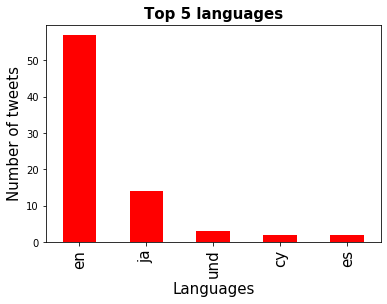

In [8]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

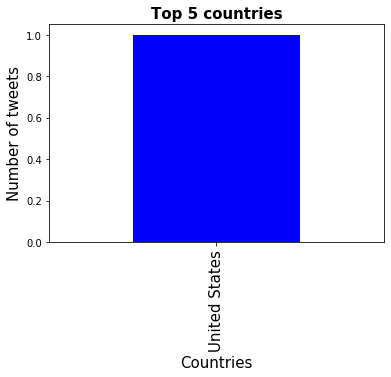

In [12]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [13]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [17]:
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))
tweets['ruby'] = tweets['text'].apply(lambda tweet: word_in_text('ruby', tweet))

tweets.head()

,text,lang,country,python,javascript,ruby
0,RT @realpython: VS Code Adds Native Editing of...,en,None,True,False,False
1,RT @gp_pulipaka: Deep #ReinforcementLearning P...,en,None,False,False,False
2,"Learn HTML,CSS,JAVASCRIPT\n\n☞ https://t.co/hm...",en,None,False,True,False
3,Lead Front-end Developer (JavaScript; Angular ...,en,None,False,True,False
4,RT @onigiritan: 突然ですが私の経歴を紹介します。\n\n学歴：母の胎内を首席...,ja,None,True,False,False


In [16]:
print(tweets['python'].value_counts()[True])
print(tweets['javascript'].value_counts()[True])
print(tweets['ruby'].value_counts()[True])

36
7
20


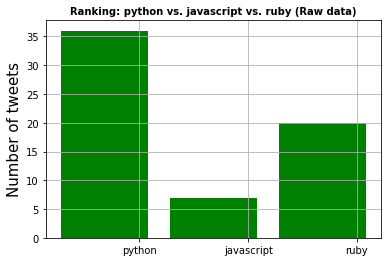

In [18]:
prg_langs = ['python', 'javascript', 'ruby']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['javascript'].value_counts()[True], tweets['ruby'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()